In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Set seed for reproducibility
np.random.seed(42)

# a) Random sample of 25 observations
sample = df.sample(25)

# Population statistics
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


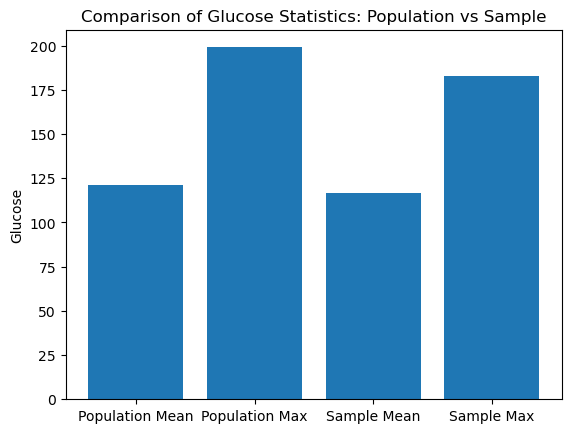

In [6]:
# Create a bar chart for comparison
fig, ax = plt.subplots()
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
ax.bar(labels, values)
ax.set_ylabel('Glucose')
plt.title('Comparison of Glucose Statistics: Population vs Sample')
plt.show()

In [7]:
# b) 98th percentile of BMI
population_percentile_bmi = np.percentile(df['BMI'], 98)
sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi

47.52599999999996

In [8]:
sample_percentile_bmi

40.248

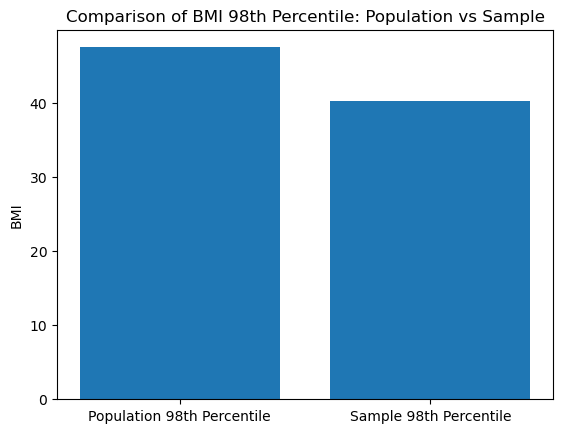

In [9]:
# Create a bar chart for comparison
fig, ax = plt.subplots()
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile_bmi, sample_percentile_bmi]
ax.bar(labels, values)
ax.set_ylabel('BMI')
plt.title('Comparison of BMI 98th Percentile: Population vs Sample')
plt.show()

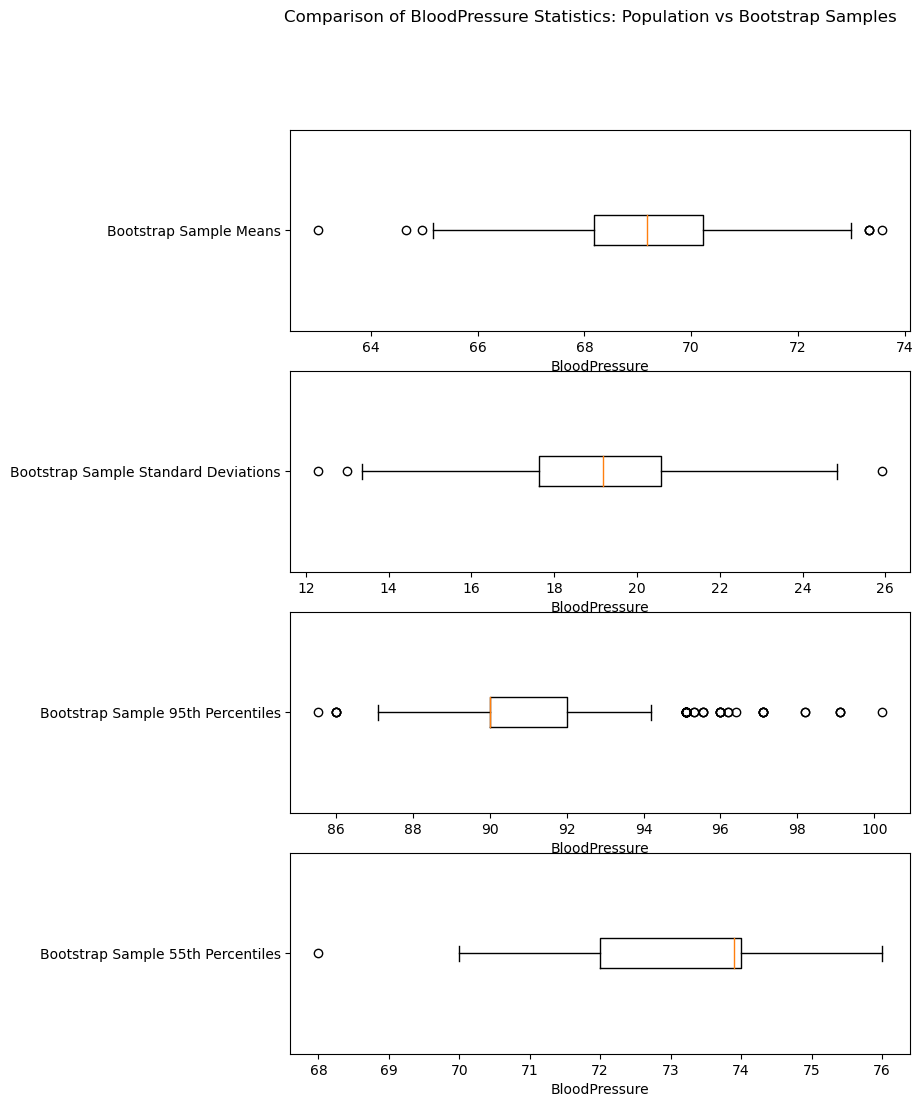

In [11]:
# c) Bootstrap sampling
n_bootstrap_samples = 500
bootstrap_sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
bootstrap_percentiless = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = df.sample(bootstrap_sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 95))  # Adjust percentile as needed
    bootstrap_percentiless.append(np.percentile(bootstrap_sample['BloodPressure'], 55))

# Population statistics
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 95) # Adjust percentile as needed
population_percentile_bp = np.percentile(df['BloodPressure'], 55)

# Create boxplots for comparison
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

axes[0].boxplot(bootstrap_means, vert=False, labels=['Bootstrap Sample Means'])
axes[0].set_xlabel('BloodPressure')
axes[1].boxplot(bootstrap_stds, vert=False, labels=['Bootstrap Sample Standard Deviations'])
axes[1].set_xlabel('BloodPressure')
axes[2].boxplot(bootstrap_percentiles, vert=False, labels=['Bootstrap Sample 95th Percentiles'])
axes[2].set_xlabel('BloodPressure')
axes[3].boxplot(bootstrap_percentiless, vert=False, labels=['Bootstrap Sample 55th Percentiles'])
axes[3].set_xlabel('BloodPressure')

plt.suptitle('Comparison of BloodPressure Statistics: Population vs Bootstrap Samples')
plt.show()

In [ ]:
# Report:

#This code uses boxplots for visualizing the bootstrap samples' statistics for the blood pressure variable. Above 4 Boxplots indicate stats(mean,standard deviation, 95th percentile, 55th percentile) comparision of 500 samples with 150 observations each against stats of overall population. Each boxplot represents a distribution obtained from a bootstrap sample. The red dashed lines indicate the corresponding statistics from the population. The average mean from bootstrap samples is centered around the population mean. The standard deviations from bootstrap samples vary, but they generally align with the population standard deviation.The 95th and 55th percentiles from bootstrap samples capture the variability seen in the population, indicating a similar distribution. 

